<a href="https://colab.research.google.com/github/theagegeshidze/theagegeshidze.github.io/blob/main/PCAedited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#import necessary packages, using skills generated through a kaggle tutorial on creating a clustered graph about pokemon, and after trying to do it with
# pythons in system data set on iris flowers

In [ ]:
df=pd.read_csv('PCA3.csv')

In [ ]:
# i found the concept of dimensionality reduction very difficult to grasp, but now understand it as creating data visualisation for a data set
# that has multiple dimensions, by creating a matrix or eigen vector of sorts and correlating our results and paying attention to which class you belong to
# for my data set from worldometer, I filtered continent information and created 3 classes

In [ ]:
df

,Population,Area square miles,GDP USD per capita,Class
0,31056997,647500,700,3
1,3581655,28748,4500,1
2,32930091,2381740,6000,2
3,71201,468,19000,1
4,12127071,1246700,1900,2
...,...,...,...,...
138,84402966,329560,2500,3
139,2460492,5860,800,3
140,21456188,527970,800,3
141,11502010,752614,800,2


In [ ]:
x = df.drop(labels='Class', axis=1).values
#dropping the value of class
y = df['Class'].values

In [ ]:
print(x.shape, y.shape)
# this is the "shape" of our data

(143, 3) (143,)


In [ ]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None

        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]

        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [ ]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(x)

In [ ]:
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

(-1.0, 3.0)

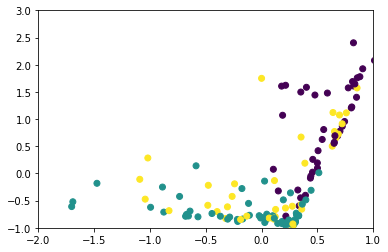

In [ ]:
x_std = pca.transform(transformed)

plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)
plt.xlim([-2, 1])
plt.ylim([-1, 3])

In [ ]:
# want to add axis values and title and ensure we like the form of the graph

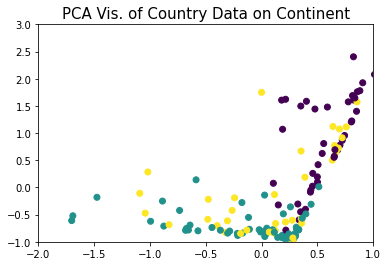

In [ ]:

x_std = pca.transform(transformed)

plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)
plt.xlim([-2, 1])
plt.ylim([-1, 3])

plt.title('PCA Vis. of Country Data on Continent', fontsize=15)
plt.savefig('PCAunsupervised')
plt.show()

In [ ]:
# we have our pca scatter graph, supervisided machine learning
# i found the general concept of machine learning very difficult to grasp, but am proud of what i have achieved